In [1]:
import random
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from scipy.spatial import distance
import numpy as np
import time
from IPython import display
from tqdm import tqdm

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

(20, 2)


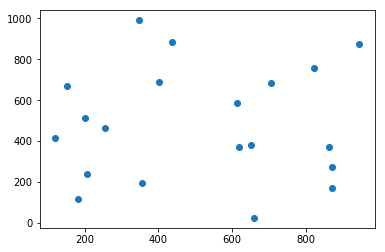

In [3]:
#number of points
n=20
d=2
k=6
maxx=1000
####################################
X= np.random.random((n,d))*maxx
print (X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

# #Heirarchical clustering

What is linkage matrix?
What does linkage do?

In [3]:
np.ones((5))

array([ 1.,  1.,  1.,  1.,  1.])

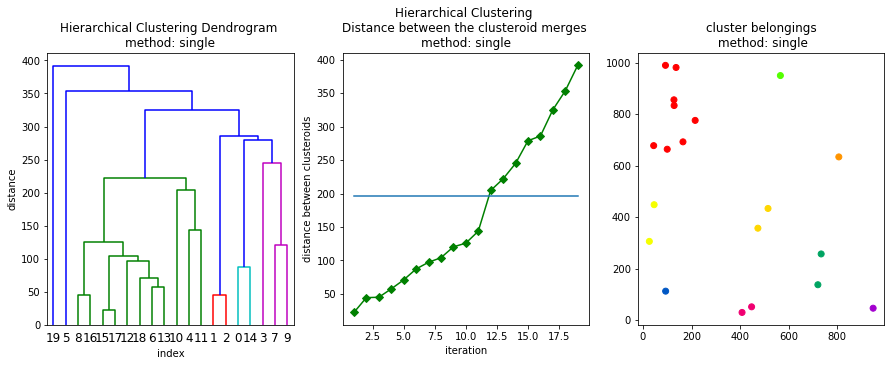

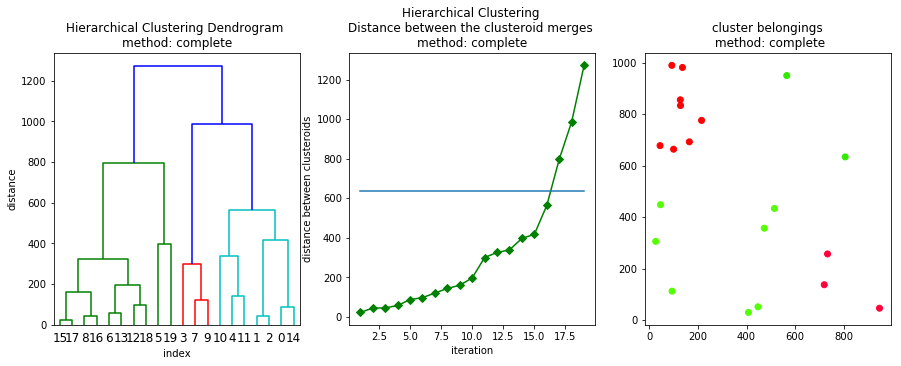

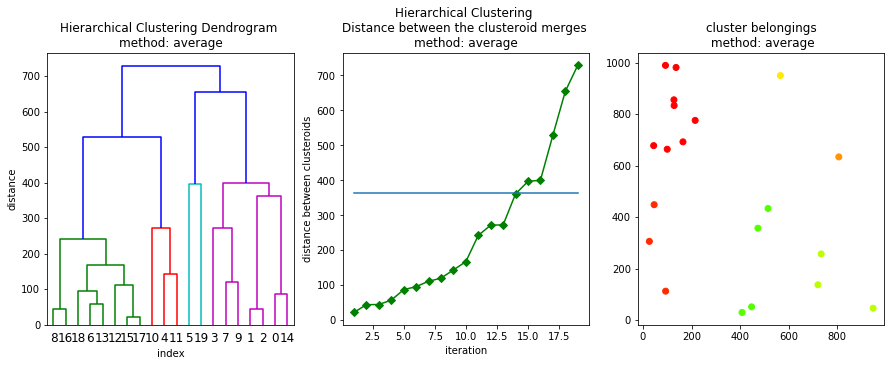

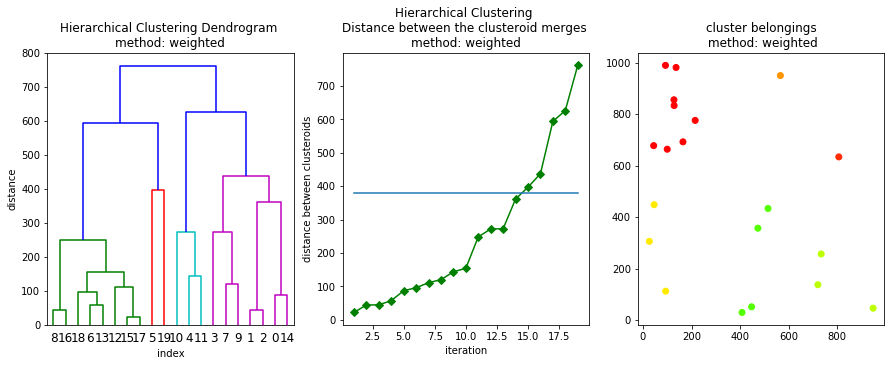

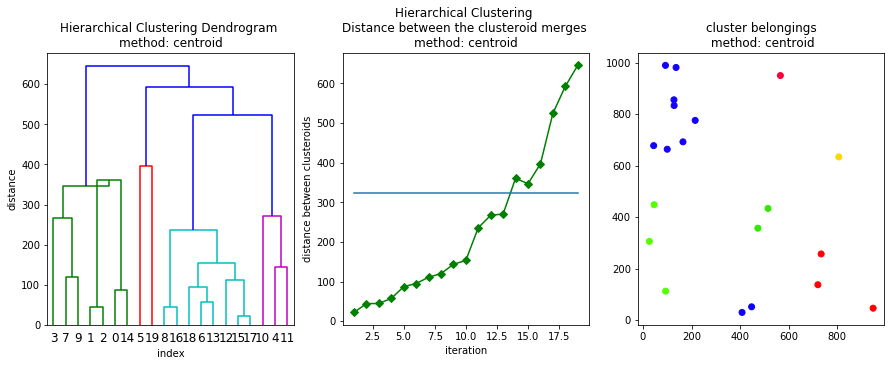

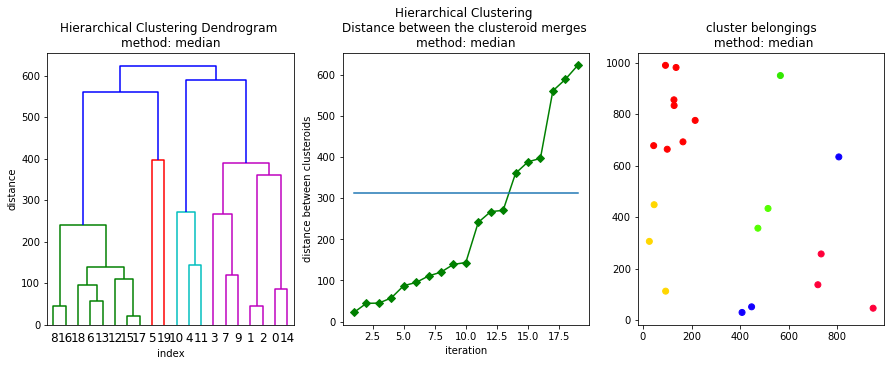

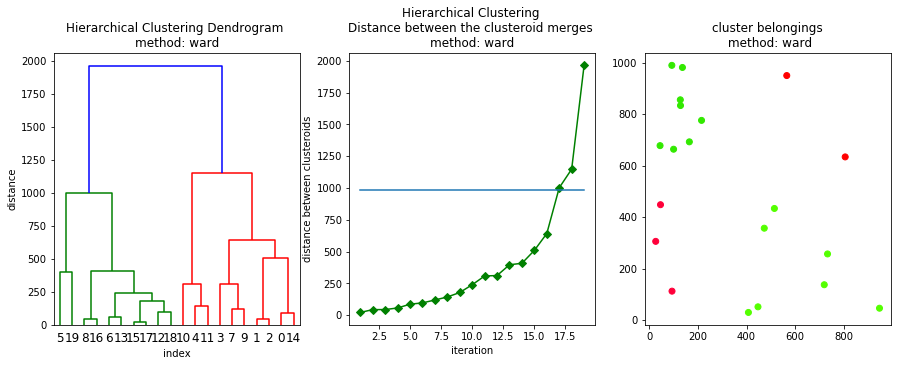

In [4]:
linkage_method=['single','complete','average','weighted','centroid','median','ward']
metric='euclidean'
for m in linkage_method:
    Z=linkage(X,m, metric)
    clusters=fcluster(Z,Z[-1,2]/2, criterion='distance')
    plt.figure(figsize=(15, 5))
    plt.subplot(1,3,1)
    plt.title('Hierarchical Clustering Dendrogram \nmethod: '+m)
    plt.xlabel('index')
    plt.ylabel('distance')
    dendrogram(Z)
    plt.subplot(1,3,2)
    plt.title('Hierarchical Clustering \nDistance between the clusteroid merges \nmethod: '+m)
    plt.plot(np.arange(1,n), Z[:,2],'-gD')
    plt.plot(np.arange(1,n), (Z[-1,2]/2)* np.ones(n-1),'-')
    plt.xlabel('iteration')
    plt.ylabel('distance between clusteroids')
    plt.subplot(1,3,3)
    plt.title('cluster belongings\n method: '+m)
    plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')
    plt.show()

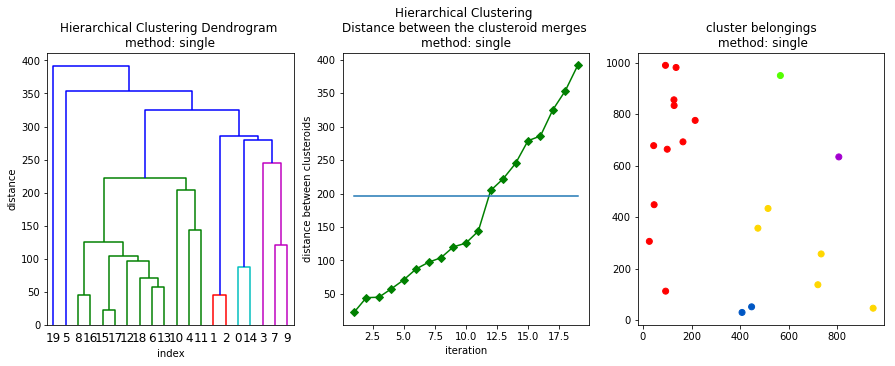

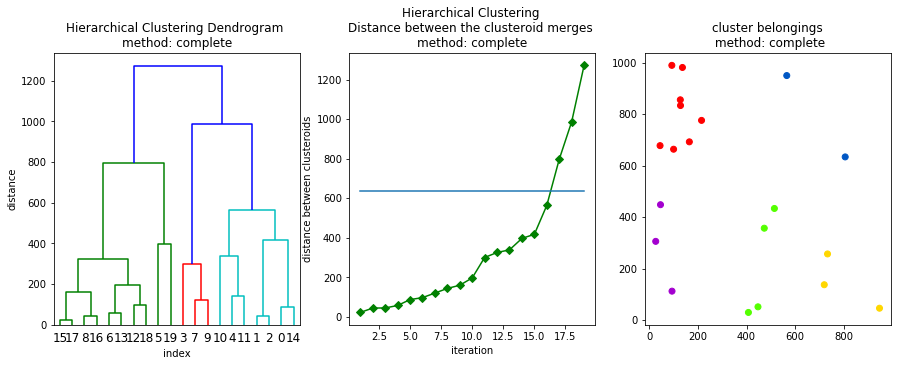

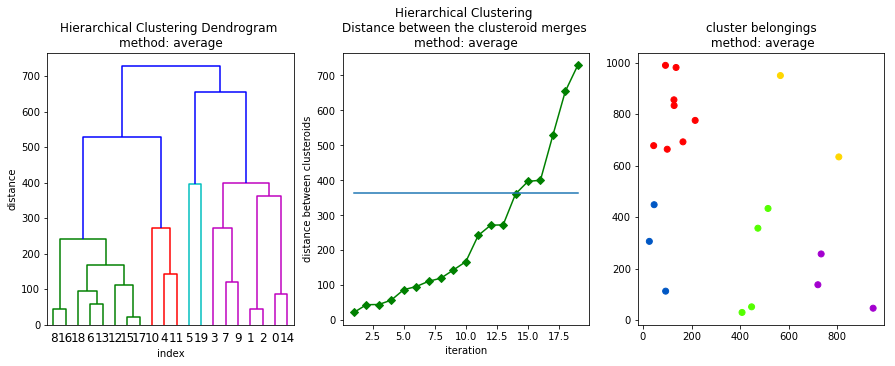

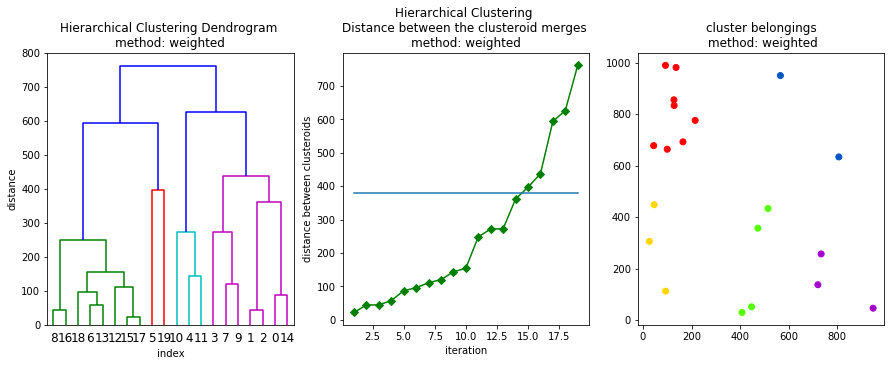

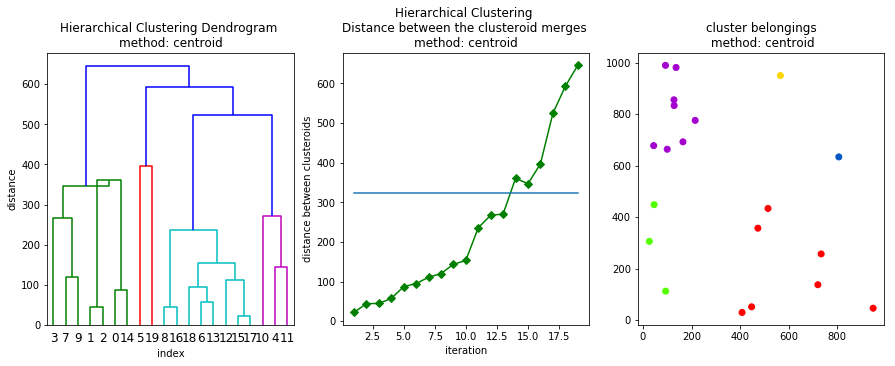

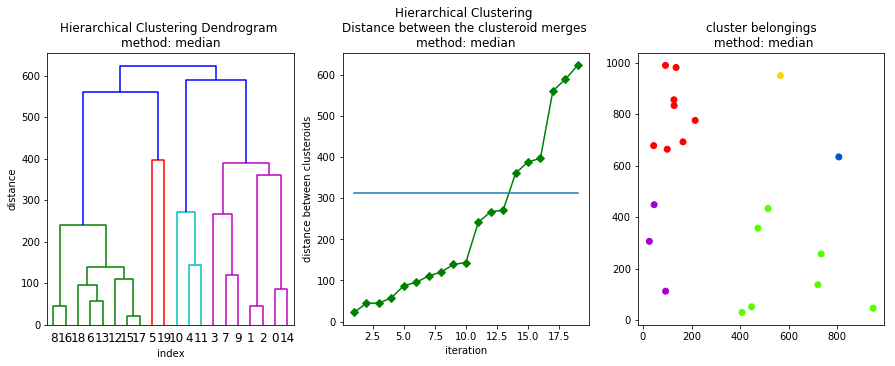

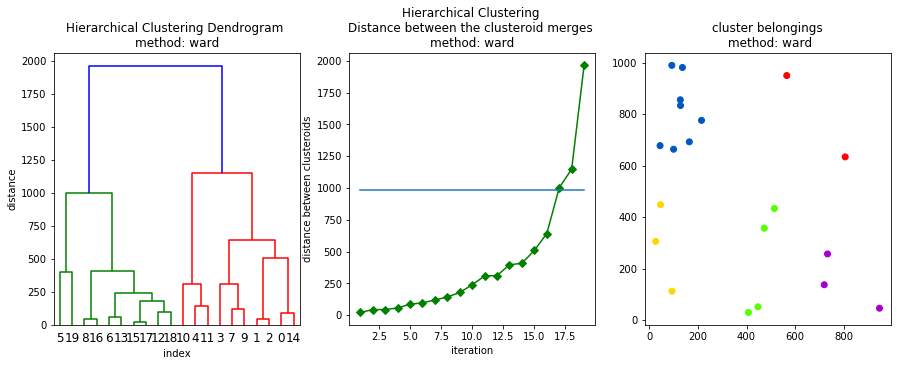

In [5]:
linkage_method=['single','complete','average','weighted','centroid','median','ward']
metric='euclidean'
max_clus=5
for m in linkage_method:
    Z=linkage(X,m, metric)
    clusters=fcluster(Z,max_clus, criterion='maxclust')
    plt.figure(figsize=(15, 5))
    plt.subplot(1,3,1)
    plt.title('Hierarchical Clustering Dendrogram \nmethod: '+m)
    plt.xlabel('index')
    plt.ylabel('distance')
    dendrogram(Z)
    plt.subplot(1,3,2)
    plt.title('Hierarchical Clustering \nDistance between the clusteroid merges \nmethod: '+m)
    plt.plot(np.arange(1,n), Z[:,2],'-gD')
    plt.plot(np.arange(1,n), (Z[-1,2]/2)* np.ones(n-1),'-')
    plt.xlabel('iteration')
    plt.ylabel('distance between clusteroids')
    plt.subplot(1,3,3)
    plt.title('cluster belongings\n method: '+m)
    plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')
    plt.show()

(40, 25)


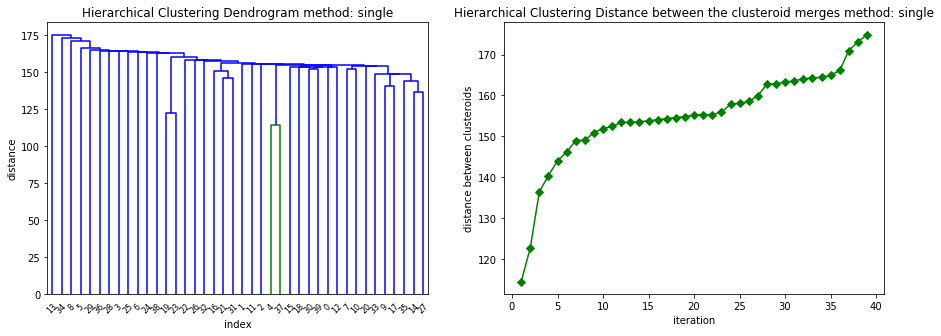

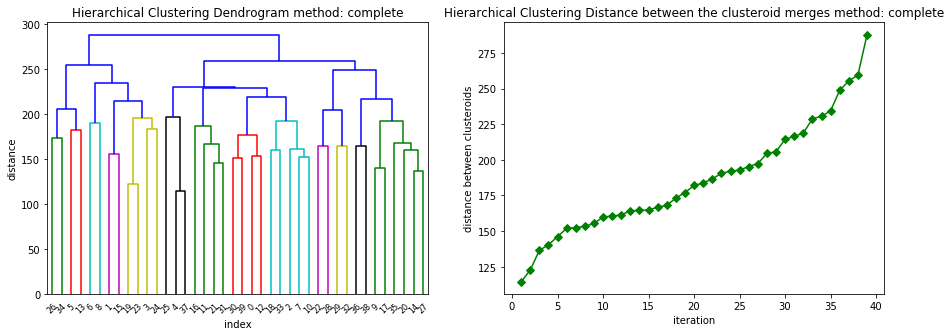

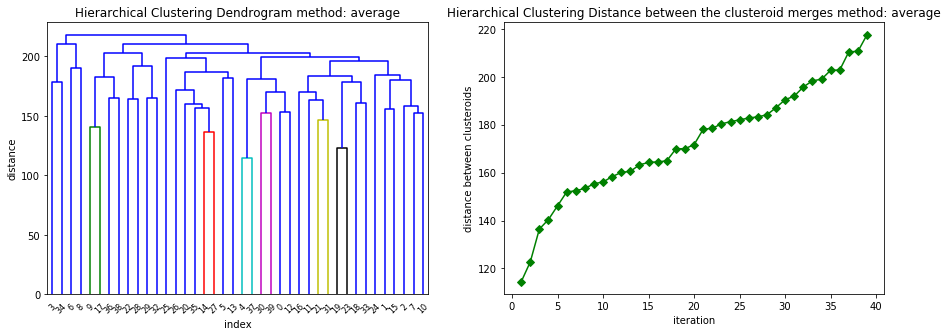

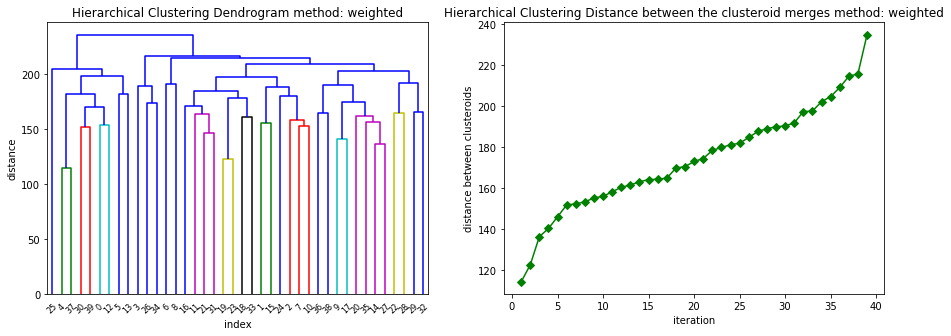

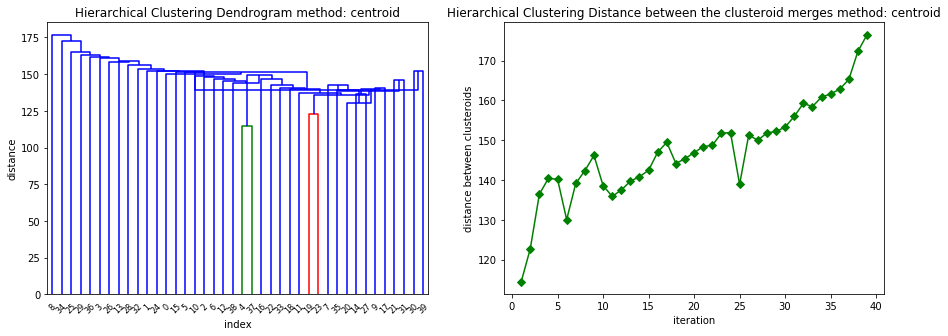

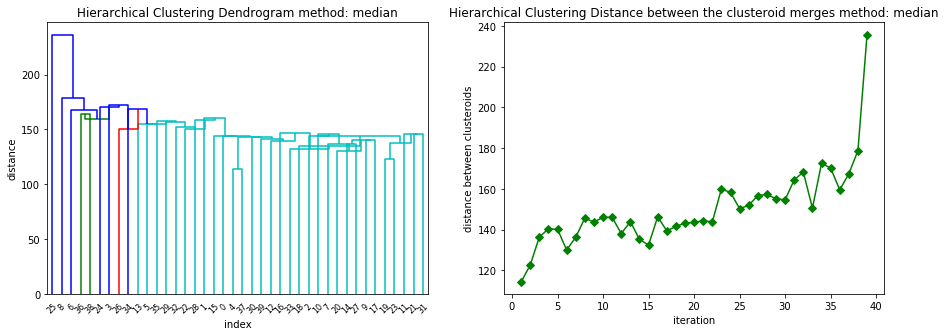

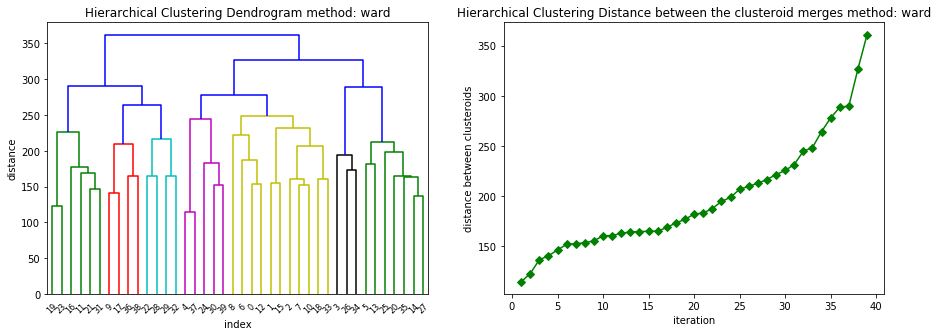

In [6]:
##write better seeding
n=40
d=25
k=6
maxx=100
X= np.random.random((n,d))*maxx
print (X.shape)  # 150 samples with 2 dimensions

linkage_method=['single','complete','average','weighted','centroid','median','ward']
metric='euclidean'
for m in linkage_method:
    Z=linkage(X,m, metric)
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    plt.title('Hierarchical Clustering Dendrogram method: '+m)
    plt.xlabel('index')
    plt.ylabel('distance')
    dendrogram(Z)
    plt.subplot(1,2,2)
    plt.title('Hierarchical Clustering Distance between the clusteroid merges method: '+m)
    plt.plot(np.arange(1,n), Z[:,2],'-gD')
    plt.xlabel('iteration')
    plt.ylabel('distance between clusteroids')
    plt.show()

# #K-means

In [1]:
print(n,k,d,maxx)

NameError: name 'n' is not defined

In [8]:
def update_centroids(clusters, centroids,X):
    #print(len(centroids))
    for i in range(len(centroids)):
        #print(i in clusters)
        if (i in clusters):
            centroids[i]=np.mean(X[np.where(clusters==i)], axis=0)
    return centroids

iterations=10

def plot_scatter(X,centroids, clusters):
    #print(X,centroids, clusters)
    plt.gca().cla()
    plt.scatter(X[:,0], X[:,1],c=(clusters.astype(int)), alpha=0.5, cmap='prism')
    plt.scatter(centroids[:,0], centroids[:,1],marker="*", cmap='prism')
    plt.axis([0,maxx,0,maxx])
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)

def k_means(X, k):
    #initializing random centroids
    centroids= np.random.random((k,d))*maxx
    clusters=np.ones(len(X))*-1
    plt.axis([0, maxx, 0, maxx])
    plt.ion()   
    for x in (range(iterations)):
        for i in range(len(X)):
            clusters[i]=np.argmin([distance.euclidean(X[i], j) for j in centroids])
        #update centroid
            centroids=update_centroids(clusters,centroids,X)
            plot_scatter(X, centroids,clusters)
    #return clusters, centroids
        

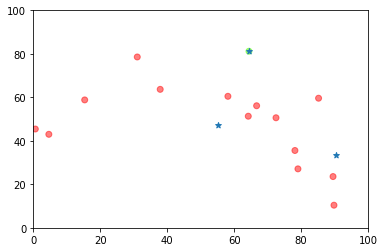

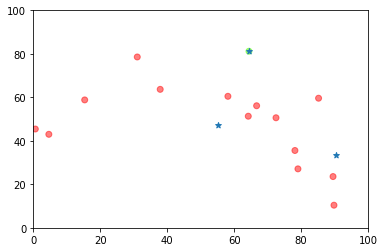

In [9]:
n=15
k=3
X= np.random.random((n,d))*maxx
k_means(X,k)

In [5]:
l = []
l.append('foo')
l.append('bar')
l.append('baz')

s = ''.join(l)

In [6]:
s

'foobarbaz'